In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'C:\Users\user\OneDrive\heart att\healthcare-dataset-stroke-data.csv')

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe().T

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00      1.00

In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r'C:\Users\user\OneDrive\heart att\healthcare-dataset-stroke-data.csv')

# Identify the column you want to delete, let's say it's called 'column_to_delete'
column_to_delete = 'avg_glucose_level'

# Drop the column
df = df.drop(columns=[column_to_delete])

# Now, df contains your dataset without the specified column


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5110 non-null   int64  
 1   gender          5110 non-null   object 
 2   age             5110 non-null   float64
 3   hypertension    5110 non-null   int64  
 4   heart_disease   5110 non-null   int64  
 5   ever_married    5110 non-null   object 
 6   work_type       5110 non-null   object 
 7   Residence_type  5110 non-null   object 
 8   bmi             4909 non-null   float64
 9   smoking_status  5110 non-null   object 
 10  stroke          5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [9]:
df.isnull().sum()

id                  0
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
work_type           0
Residence_type      0
bmi               201
smoking_status      0
stroke              0
dtype: int64

In [10]:
(df.isnull().sum()/df.shape[0]) * 100

id                0.000000
gender            0.000000
age               0.000000
hypertension      0.000000
heart_disease     0.000000
ever_married      0.000000
work_type         0.000000
Residence_type    0.000000
bmi               3.933464
smoking_status    0.000000
stroke            0.000000
dtype: float64

In [11]:
df.drop("id", axis = 1, inplace=True)
df.drop(df[df['age'] < 1].index, inplace=True)
#Mendrop data pada atribut age yang umurnya kurang dari 1 tahun

df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
df["Residence_type"].unique()



array(['Urban', 'Rural'], dtype=object)

In [13]:
df["Residence_type"].unique()



array(['Urban', 'Rural'], dtype=object)

In [14]:
df.dropna(subset=['bmi'], inplace=True)

In [15]:
categorical_feature= df.columns[df.dtypes=='object'].tolist()
print(categorical_feature)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [16]:
numerical_feature= df.select_dtypes(include='number').columns.tolist()
print(numerical_feature)

['age', 'hypertension', 'heart_disease', 'bmi', 'stroke']


In [17]:
numerical_feature = ['age', 'bmi']

In [18]:
cat_enc_feature= ['hypertension', 'heart_disease']
target= ['stroke']

In [19]:
df[numerical_feature].describe()

age          bmi
count  4867.000000  4867.000000
mean     43.230812    28.985720
std      22.304969     7.817091
min       1.000000    10.300000
25%      25.000000    23.700000
50%      45.000000    28.100000
75%      60.500000    33.100000
max      82.000000    97.600000

In [20]:
df[categorical_feature].describe()

gender ever_married work_type Residence_type smoking_status
count     4867         4867      4867           4867           4867
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2882         3204      2811           2468           1852

In [21]:
stroke_dist=df['stroke'].value_counts(normalize=True)
stroke_dist.values

array([0.95705774, 0.04294226])

In [22]:
stroke_dist.keys()

Int64Index([0, 1], dtype='int64')

In [23]:
# Data
labels = ['No Stroke', 'Stroke']
sizes = [95.7, 4.29]  # Persentase distribusi
colors = ['lightskyblue', 'lightcoral']

# Plot pie chart
fig = px.pie(labels=labels, values=sizes, title='Population of European continent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [24]:
hypertension_dist=df[cat_enc_feature[0]].value_counts(normalize=True)
hypertension_dist

0    0.907335
1    0.092665
Name: hypertension, dtype: float64

In [25]:
hd_dist=df[cat_enc_feature[1]].value_counts(normalize=True)
hd_dist

0    0.950072
1    0.049928
Name: heart_disease, dtype: float64

In [26]:
df.groupby(['hypertension','stroke']).size().unstack()

stroke           0    1
hypertension           
0             4267  149
1              391   60

In [27]:
pd.crosstab(df['hypertension'], df['stroke'], normalize='index')

stroke               0         1
hypertension                    
0             0.966259  0.033741
1             0.866962  0.133038

In [28]:
pd.crosstab(df['heart_disease'], df['stroke'], normalize='index')

stroke                0         1
heart_disease                    
0              0.963452  0.036548
1              0.835391  0.164609

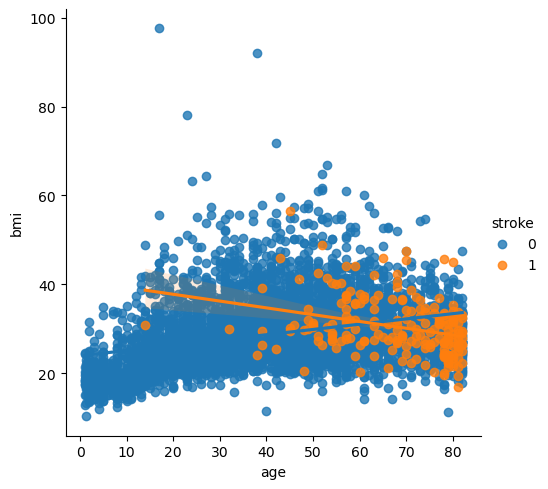

In [29]:
import seaborn as sns


# Plot using lmplot
sns.lmplot(df, x='age',y='bmi', hue='stroke');


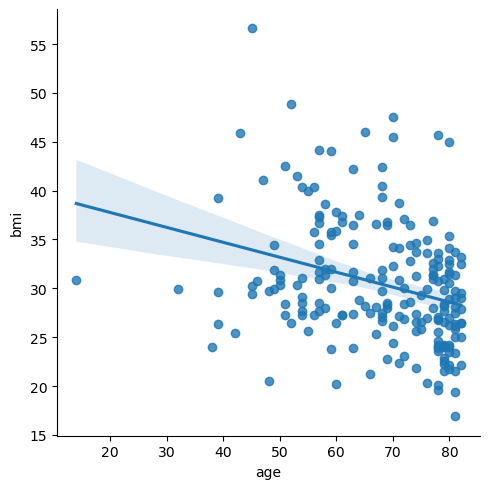

In [30]:
sns.lmplot(data=df.query('stroke==1'), x='age', y='bmi') 

In [31]:
df.query('stroke==1')[['age']].describe()

age
count  209.000000
mean    67.712919
std     12.402848
min     14.000000
25%     58.000000
50%     70.000000
75%     78.000000
max     82.000000

<Axes: xlabel='age', ylabel='Count'>

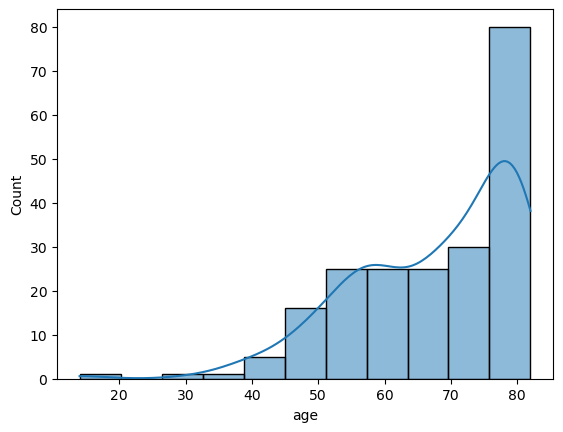

In [32]:
sns.histplot(data=df.query('stroke==1'), x='age', kde=True)

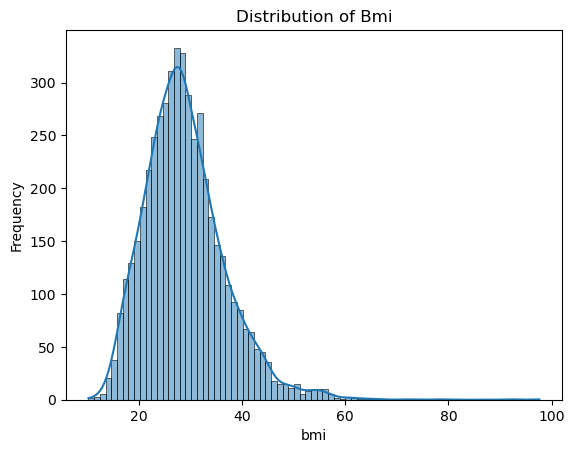

In [33]:
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of Bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

In [34]:
batas_rendah = df['bmi'].quantile(0.25)
batas_tinggi = df['bmi'].quantile(0.75)

In [35]:
def kategorikan_glukosa(glukosa):
    if glukosa < batas_rendah:
        return 'rendah'
    elif glukosa <= batas_tinggi:
        return 'normal'
    else:
        return 'tinggi'

In [36]:
df['bmi_categories'] = df['bmi'].apply(kategorikan_glukosa)

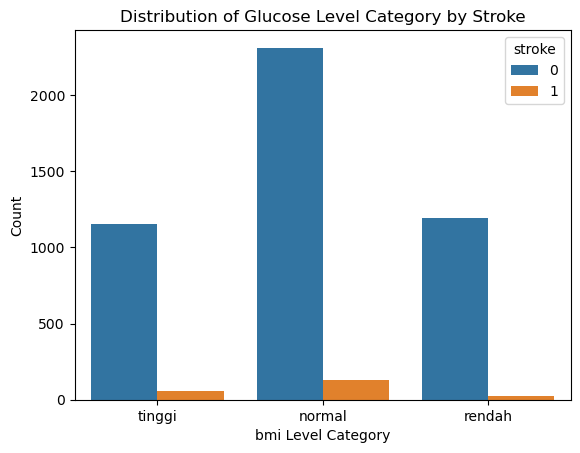

In [37]:
sns.countplot(data=df, x='bmi_categories', hue='stroke')
plt.title('Distribution of Glucose Level Category by Stroke')
plt.xlabel('bmi Level Category')
plt.ylabel('Count')
plt.show()

In [38]:
df['bmi_categories'] = pd.cut(df['bmi'], 
                              bins=[0, 18.4, 24.9, 39.9, np.inf], 
                              labels=['Underweight', 'Normal weight', 
                                      'Overweight', 'Obese'])

In [39]:
def percetage_data(df=None, column=None,sort=True):
    value_counts = df[column].value_counts(sort=sort)
    df_percentage = pd.DataFrame({'count': value_counts, 
                                  'percentage': round(value_counts *100 / len(df),2) 
                                 })
    return df_percentage

percetage_data(df,'bmi_categories')

count  percentage
Overweight      2914       59.87
Normal weight   1227       25.21
Obese            414        8.51
Underweight      312        6.41

In [40]:
pd.crosstab(df['bmi_categories'], df['stroke'], normalize='index')

stroke                 0         1
bmi_categories                    
Underweight     0.996795  0.003205
Normal weight   0.971475  0.028525
Overweight      0.947152  0.052848
Obese           0.954106  0.045894

In [41]:
df.query('stroke==1 and age<=20')

gender   age  hypertension  heart_disease ever_married work_type  \
245  Female  14.0             0              0           No  children   

    Residence_type   bmi smoking_status  stroke bmi_categories  
245          Rural  30.9        Unknown       1     Overweight

In [42]:
other= df[(df['gender']=='Other')]
df.drop(other.index, inplace=True)

In [43]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [44]:
display(df.smoking_status.unique())
display(df.smoking_status.value_counts())


array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

never smoked       1852
Unknown            1441
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [45]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [46]:
missing_values = df.isnull().sum()
print(missing_values)


gender            0
age               0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
Residence_type    0
bmi               0
smoking_status    0
stroke            0
bmi_categories    0
dtype: int64


<Axes: >

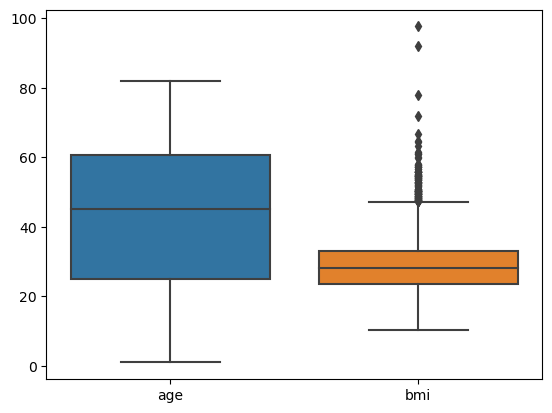

In [47]:
sns.boxplot(data=df[['age', 'bmi']])

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age',  'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

<Axes: >

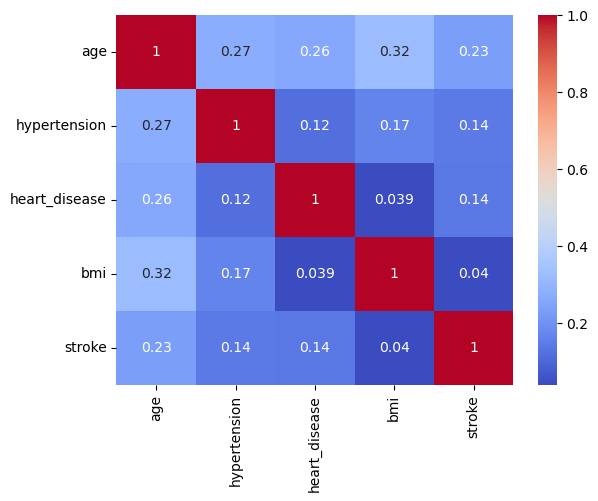

In [49]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Matriks korelasi antar variabel numerik
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [50]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 60, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Elderly'])

In [51]:
df.describe()

age  hypertension  heart_disease          bmi       stroke
count  4866.000000   4866.000000    4866.000000  4866.000000  4866.000000
mean      0.521412      0.092684       0.049938     0.214056     0.042951
std       0.275381      0.290019       0.217840     0.089546     0.202768
min       0.000000      0.000000       0.000000     0.000000     0.000000
25%       0.296296      0.000000       0.000000     0.153494     0.000000
50%       0.543210      0.000000       0.000000     0.203895     0.000000
75%       0.737654      0.000000       0.000000     0.261168     0.000000
max       1.000000      1.000000       1.000000     1.000000     1.000000

In [52]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 4866
Variables: 12
cat_cols: 10
num_cols: 2


In [53]:
cat_cols, num_cols, cat_but_car

(['gender',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status',
  'hypertension',
  'heart_disease',
  'stroke',
  'bmi_categories',
  'age_group'],
 ['age', 'bmi'],
 [])

        gender      Ratio
Female    2882  59.227291
Male      1984  40.772709


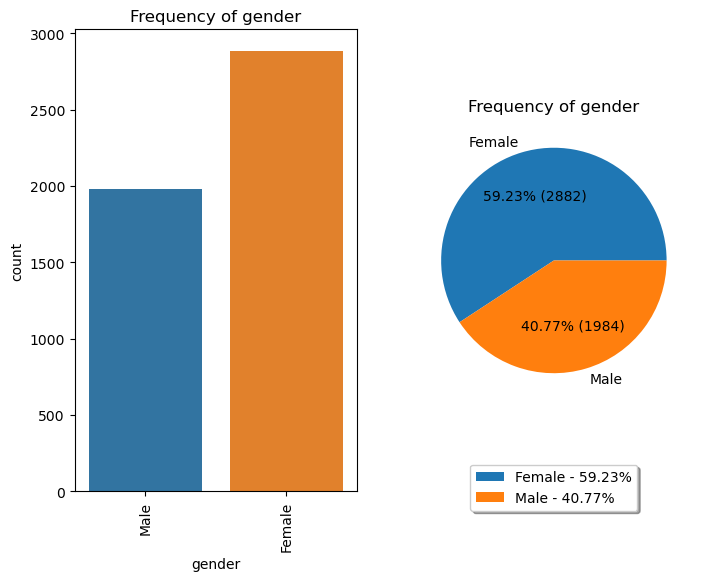

     ever_married      Ratio
Yes          3204  65.844636
No           1662  34.155364


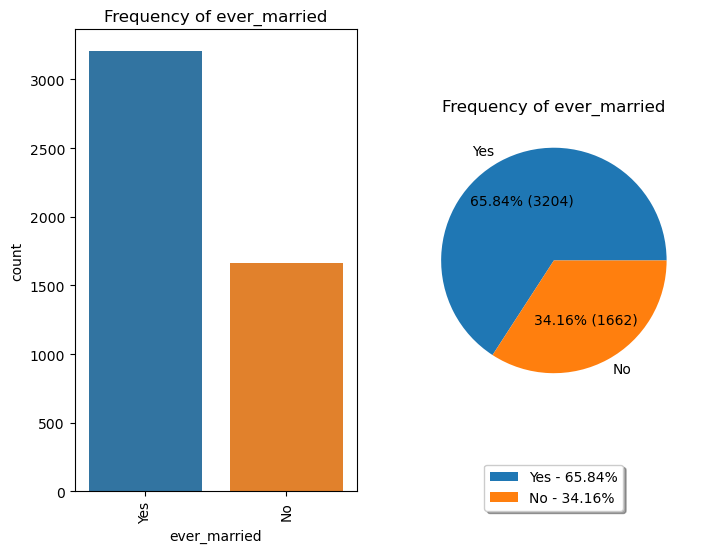

               work_type      Ratio
Private             2810  57.747637
Self-employed        775  15.926839
Govt_job             630  12.946979
children             629  12.926428
Never_worked          22   0.452117


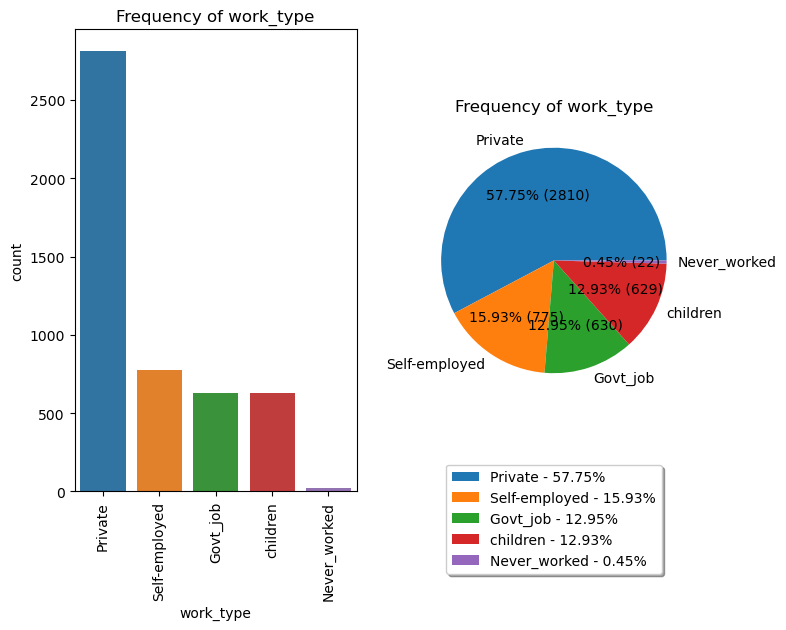

       Residence_type      Ratio
Urban            2468  50.719277
Rural            2398  49.280723


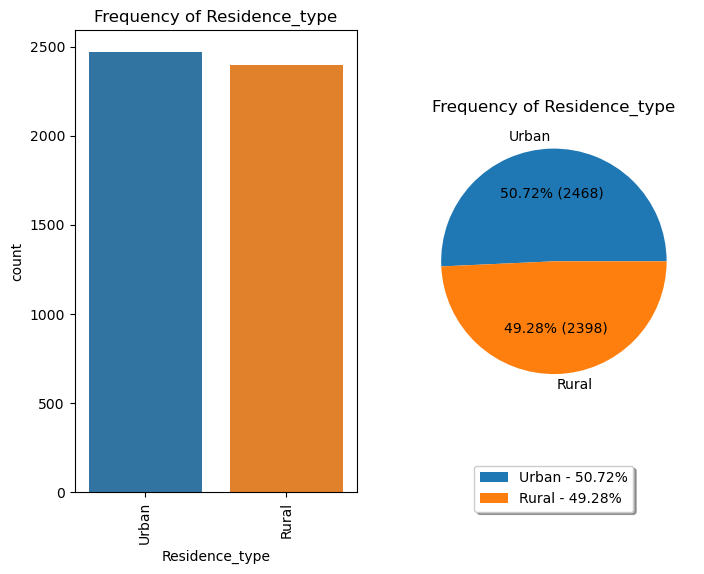

                 smoking_status      Ratio
never smoked               1852  38.060008
Unknown                    1441  29.613646
formerly smoked             836  17.180436
smokes                      737  15.145910


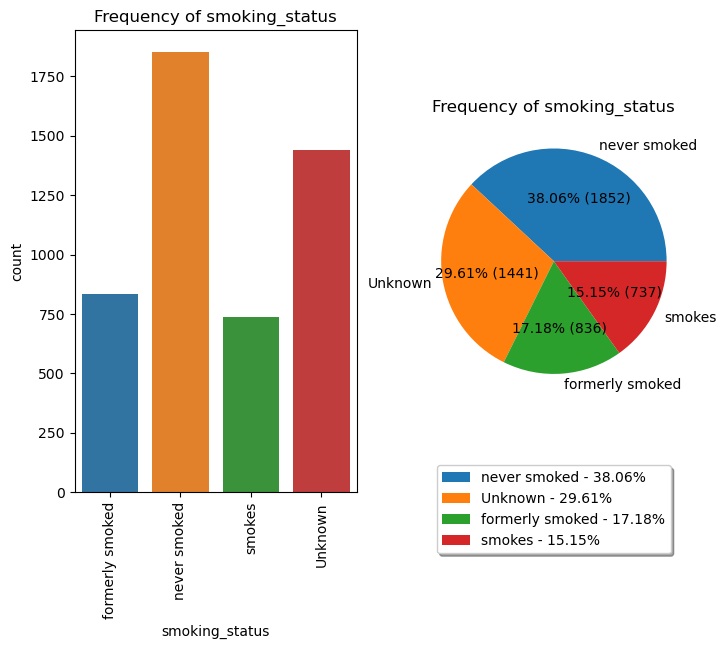

   hypertension      Ratio
0          4415  90.731607
1           451   9.268393


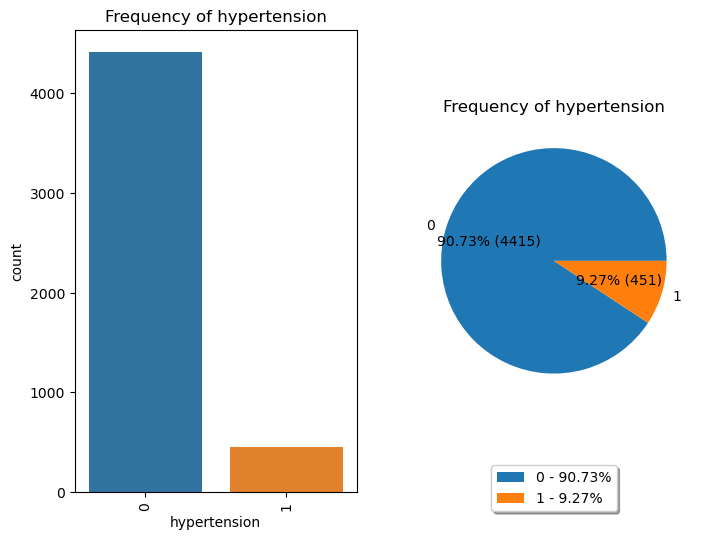

   heart_disease      Ratio
0           4623  95.006165
1            243   4.993835


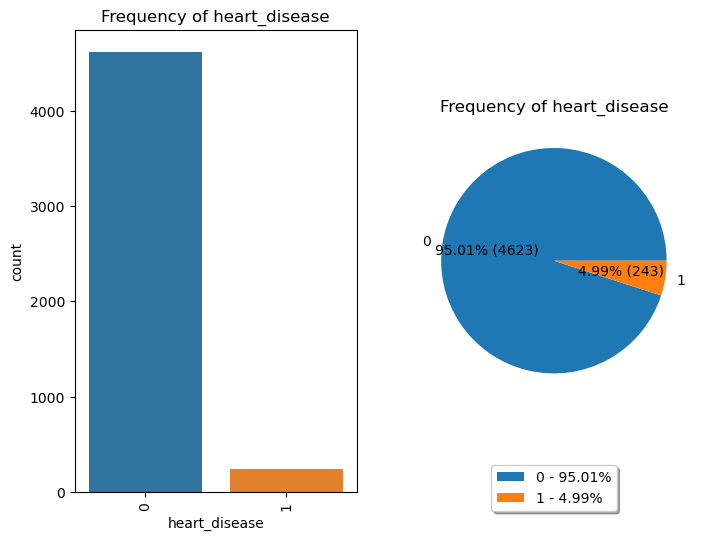

   stroke      Ratio
0    4657  95.704891
1     209   4.295109


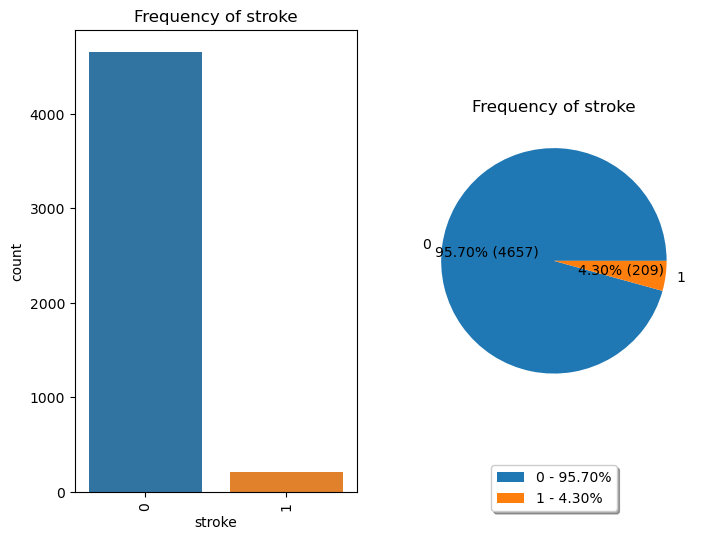

               bmi_categories      Ratio
Overweight               2914  59.884916
Normal weight            1226  25.195232
Obese                     414   8.508015
Underweight               312   6.411837


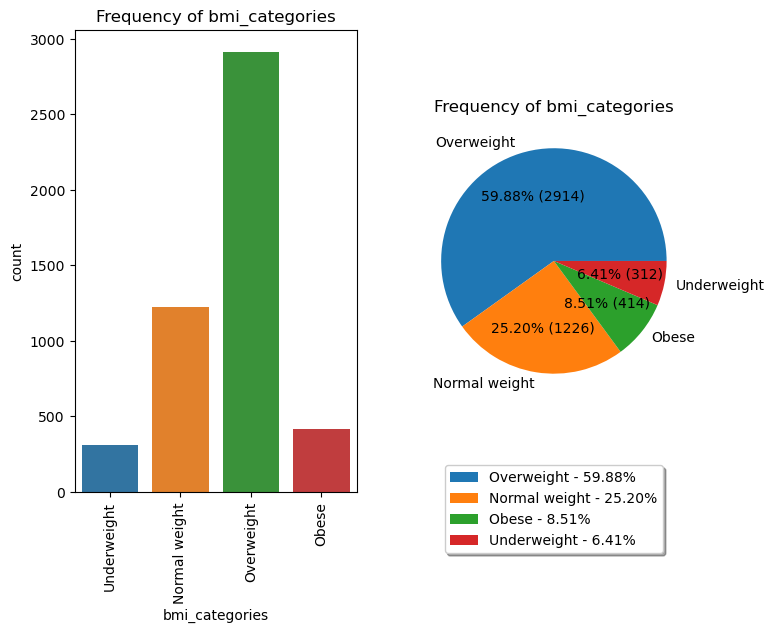

             age_group      Ratio
Child             4861  99.897246
Young Adult          0   0.000000
Adult                0   0.000000
Elderly              0   0.000000


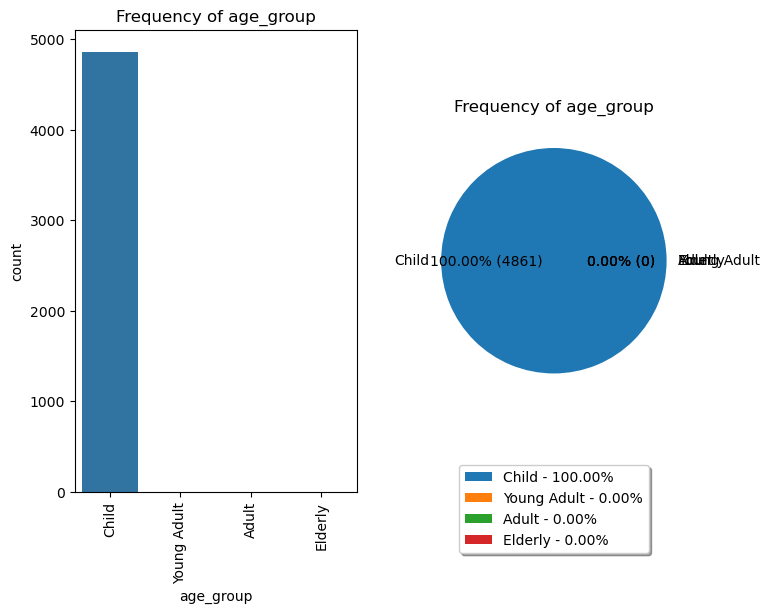

In [54]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

In [55]:
X= df.drop(['stroke','bmi_categories'], axis=1)
y= df['stroke']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
X_train.head()

gender       age  hypertension  heart_disease ever_married work_type  \
1945    Male  0.395062             0              0          Yes   Private   
4315  Female  0.333333             0              0          Yes   Private   
217   Female  0.666667             1              1          Yes   Private   
4629    Male  0.432099             0              0          Yes   Private   
478   Female  0.802469             0              0          Yes  Govt_job   

     Residence_type       bmi   smoking_status age_group  
1945          Urban  0.390607     never smoked     Child  
4315          Urban  0.332188  formerly smoked     Child  
217           Urban  0.340206           smokes     Child  
4629          Urban  0.257732     never smoked     Child  
478           Urban  0.139748  formerly smoked     Child

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PowerTransformer

# List fitur numerik
numeric_features = ['age', 'bmi']

In [58]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [59]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('power_transformer', PowerTransformer(method='yeo-johnson'))
])

In [60]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [62]:
# Pipeline lengkap
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# Menggunakan pipeline untuk preprocessing data latih
X_train_processed = preprocessor.fit_transform(X_train)
# Menggunakan pipeline yang sama untuk preprocessing data uji
X_test_processed = preprocessor.transform(X_test)

In [63]:
from sklearn.preprocessing import PowerTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson'))
])

from sklearn.feature_selection import RFE

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [64]:
# Melatih model Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_processed, y_train)

DecisionTreeClassifier()

In [65]:
# Evaluasi model Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi label menggunakan data uji yang telah diproses
y_pred = dt_model.predict(X_test_processed)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9096509240246407
Confusion Matrix:
[[879  41]
 [ 47   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       920
           1       0.15      0.13      0.14        54

    accuracy                           0.91       974
   macro avg       0.55      0.54      0.54       974
weighted avg       0.90      0.91      0.91       974



In [66]:
num_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Prediksi label menggunakan data uji yang telah diproses
y_pred_rf = rf_model.predict(X_test_processed)

# Menghitung akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.944558521560575
Confusion Matrix:
[[917   3]
 [ 51   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       920
           1       0.50      0.06      0.10        54

    accuracy                           0.94       974
   macro avg       0.72      0.53      0.54       974
weighted avg       0.92      0.94      0.92       974



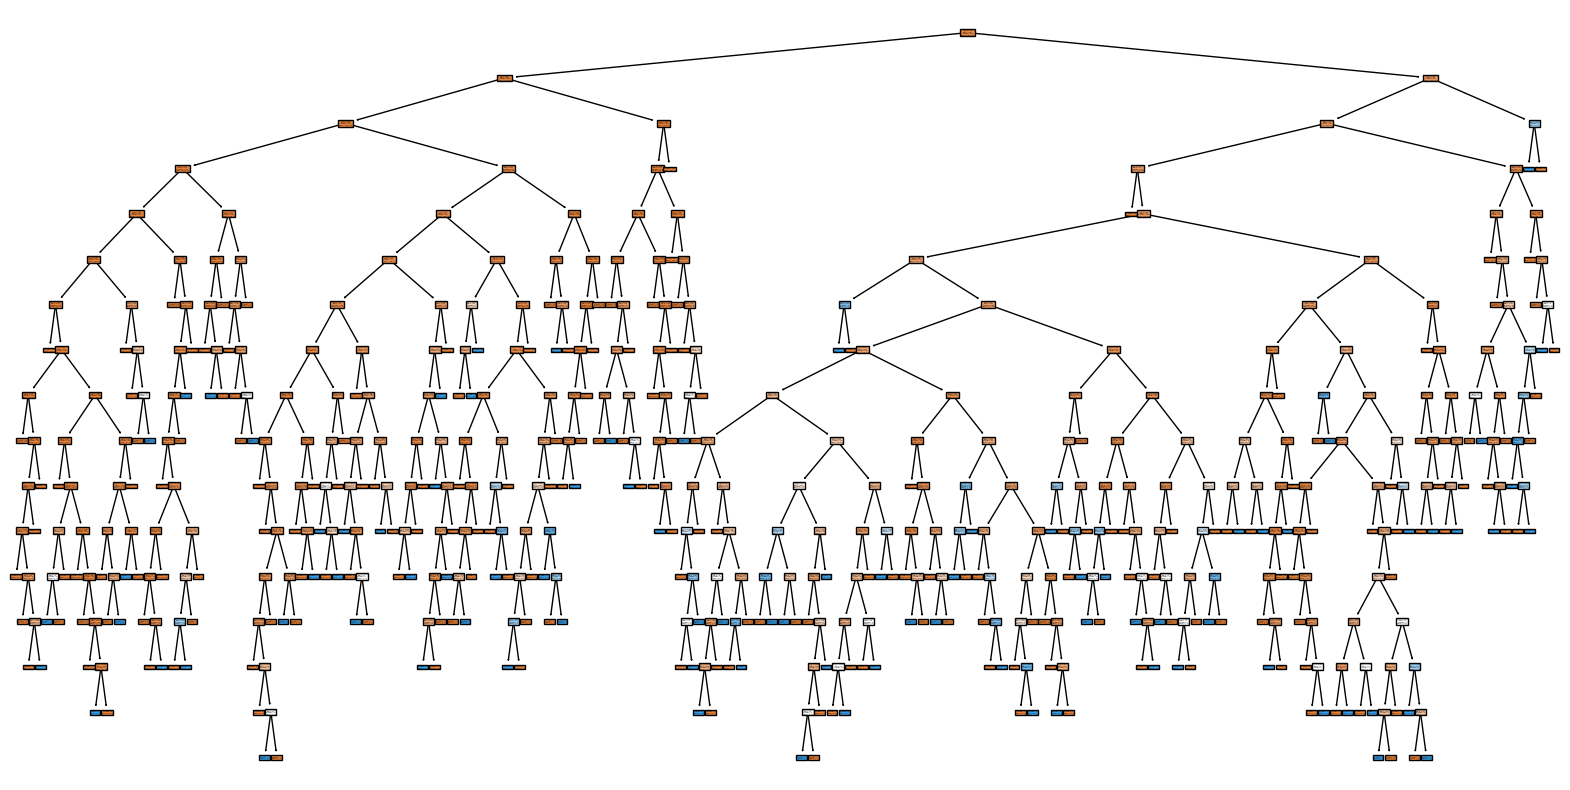

In [69]:
# Mendapatkan estimator pertama dari model Random Forest
estimator = rf_model.estimators_[0]

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True)
plt.show()

In [70]:
from sklearn.svm import SVC
# Inisialisasi model SVM
svm_model = SVC()
# Melatih model
svm_model.fit(X_train_processed, y_train)

SVC
SVC()
# Prediksi label menggunakan data uji yang telah diproses
y_pred_svm = svm_model.predict(X_test_processed)

In [71]:
# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)
Accuracy: 0.944558521560575
# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



Accuracy: 0.944558521560575
Confusion Matrix:
[[920   0]
 [ 54   0]]


In [72]:
# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       920
           1       0.00      0.00      0.00        54

    accuracy                           0.94       974
   macro avg       0.47      0.50      0.49       974
weighted avg       0.89      0.94      0.92       974



SyntaxError: unterminated string literal (detected at line 1) (3253261583.py, line 1)